In [1]:
import pandas as pd
df = pd.read_excel('142801_20231230223703588_excel.xlsx', skiprows=2, nrows=2, index_col=0)

C:\Users\gnaaak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [2]:
df.index

Index(['출생아 수', '합계 출산율'], dtype='object')

In [3]:
df.index.values

array(['출생아\xa0수', '합계\xa0출산율'], dtype=object)

In [4]:
df.rename(index = {'출생아\xa0수' : '출생아 수', '합계\xa0출산율' : '합계 출산율'}, inplace=True)

In [5]:
df.index.values

array(['출생아 수', '합계 출산율'], dtype=object)

In [6]:
# 데이터 시각화 
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # 한글 글씨체
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['axes.unicode_minus'] = False # 음수 사용

In [7]:
df = df.T

In [8]:
df['합계 출산율'] = df['합계 출산율'].astype(float)
df['출생아 수'] = df['출생아 수'].astype(str).apply(lambda x: float(x.replace(',', '')) if ',' in x else float(x))
df['출생아 수']

1970    1007.0
1971    1025.0
1972     953.0
1973     966.0
1974     923.0
1975     874.0
1976     796.0
1977     825.0
1978     751.0
1979     863.0
1980     863.0
1981     867.0
1982     848.0
1983     769.0
1984     675.0
1985     655.0
1986     636.0
1987     624.0
1988     633.0
1989     639.0
1990     650.0
1991     709.0
1992     731.0
1993     716.0
1994     721.0
1995     715.0
1996     691.0
1997     675.4
1998     641.6
1999     620.7
2000     640.1
2001     559.9
2002     496.9
2003     495.0
2004     477.0
2005     438.7
2006     451.8
2007     496.8
2008     465.9
2009     444.8
2010     470.2
2011     471.3
2012     484.6
2013     436.5
2014     435.4
2015     438.4
2016     406.2
2017     357.8
2018     326.8
2019     302.7
2020     272.3
2021     260.6
2022     249.1
Name: 출생아 수, dtype: float64

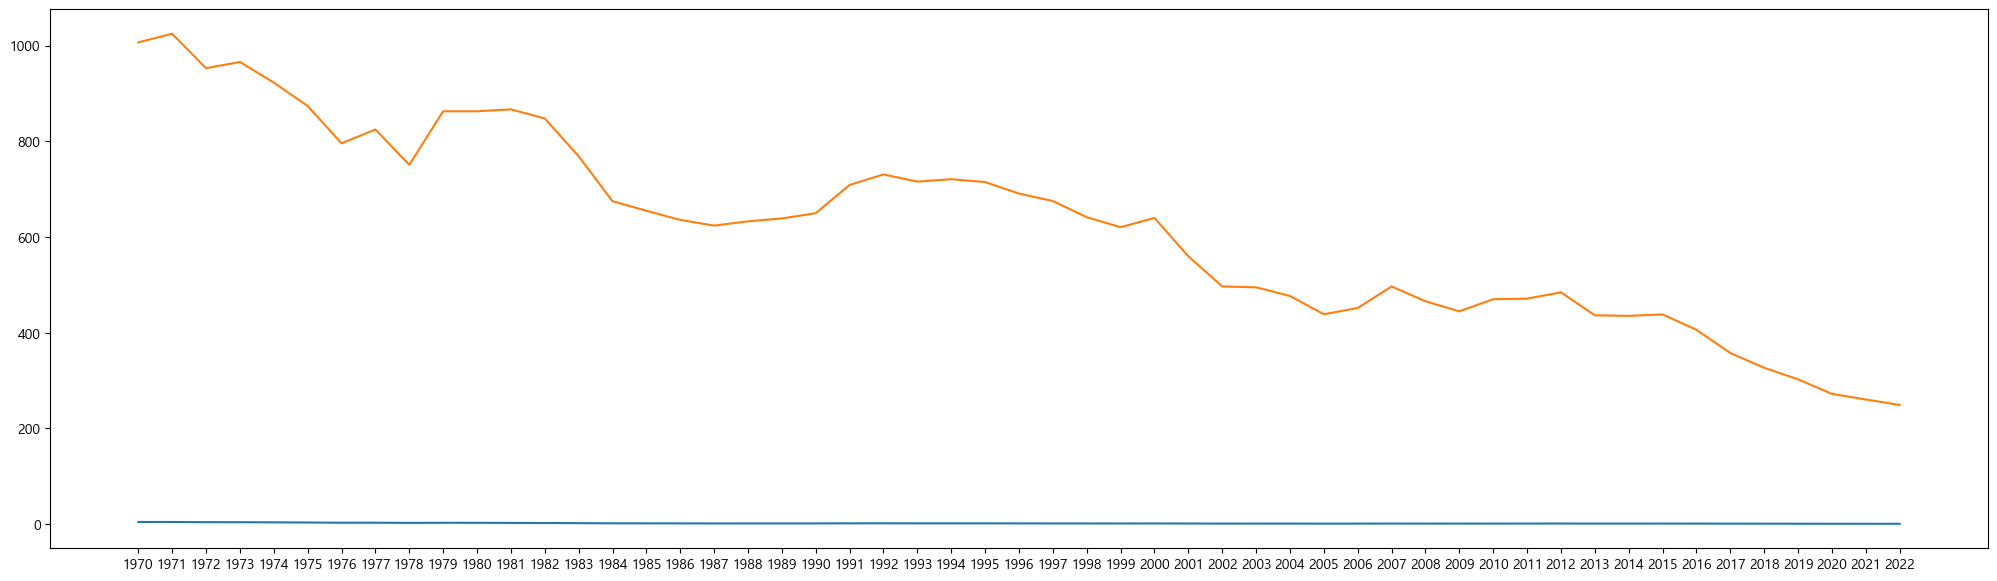

In [9]:
plt.figure(figsize=(25,7))
plt.plot(df.index, df['합계 출산율'])
plt.plot(df.index, df['출생아 수'])


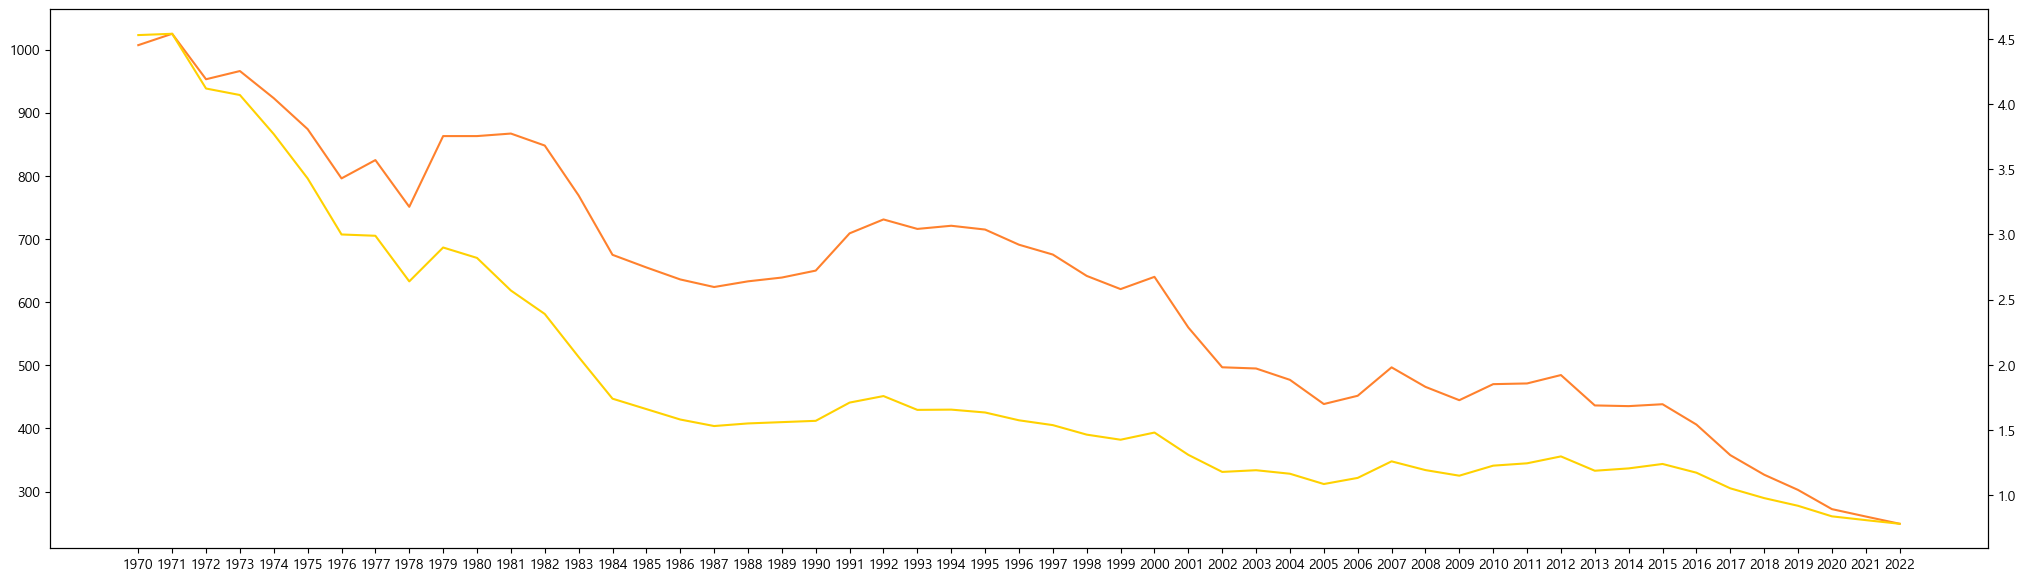

In [10]:
fig, ax1 = plt.subplots(figsize=(25,7))
ax1.plot(df.index, df['출생아 수'], color = '#ff812d')

ax2 = ax1.twinx()
ax2.plot(df.index, df['합계 출산율'], color = '#ffd100')

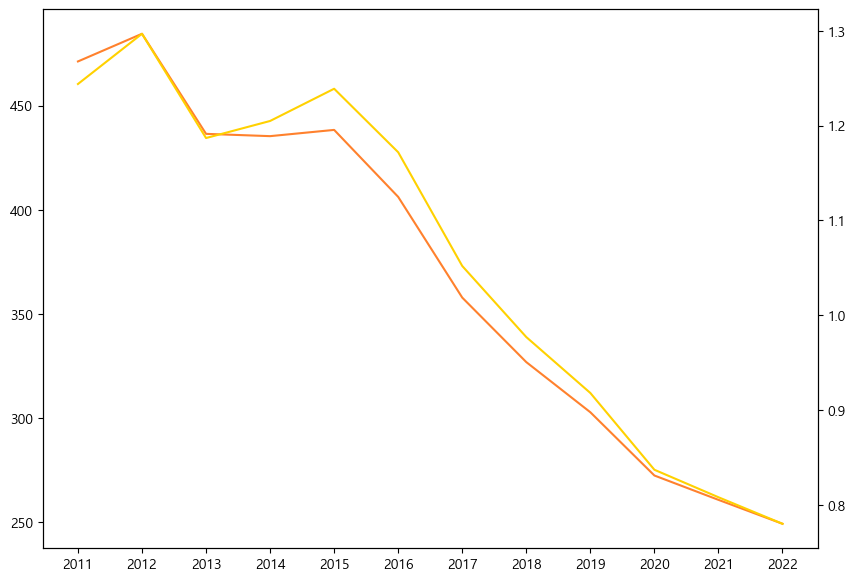

In [11]:
fig, ax1 = plt.subplots(figsize=(10, 7))
ax1.plot(df.index[-12:], df['출생아 수'].tail(12), color='#ff812d', label='출생아 수')

ax2 = ax1.twinx()
ax2.plot(df.index[-12:], df['합계 출산율'].tail(12), color='#ffd100', label='합계 출산율')


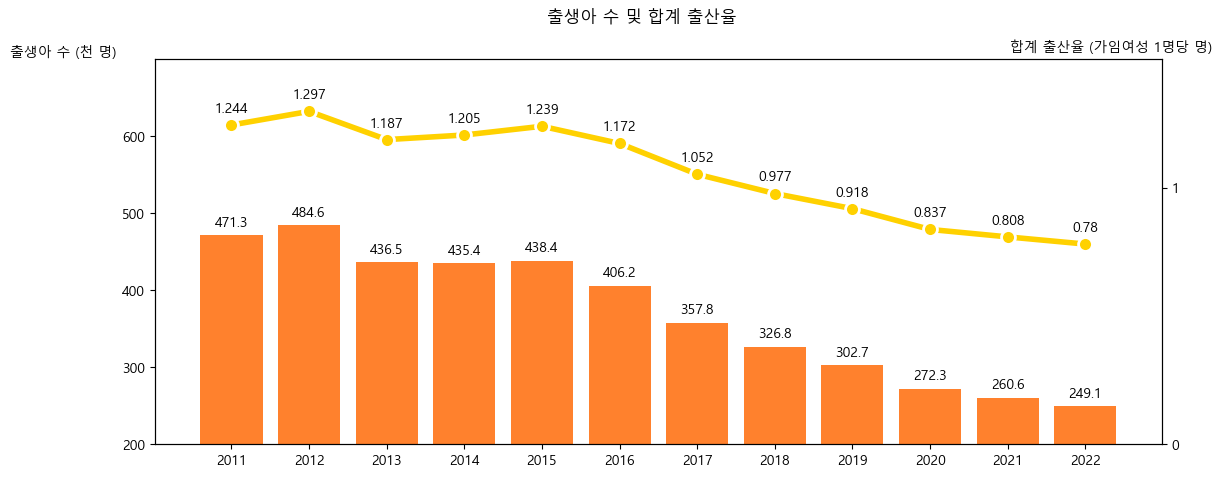

In [12]:
fig, ax1 = plt.subplots(figsize=(13, 5))
fig.suptitle('출생아 수 및 합계 출산율')
ax1.set_ylabel('출생아 수 (천 명)', rotation=0, loc='top')
ax1.set_ylim(250, 700)
ax1.set_yticks([200,300,400,500,600])
ax1.bar(df.index[-12:], df['출생아 수'].tail(12), color='#ff812d', label='출생아 수')
for idx, val in enumerate(df['출생아 수'].tail(12)):
    ax1.text(idx, val + 12, val, ha='center')

ax2 = ax1.twinx()
ax2.set_ylabel('합계 출산율 (가임여성 1명당 명)', rotation=0, loc='top')
ax2.set_ylim(0, 1.5)
ax2.set_yticks([0,1])
ax2.plot(df.index[-12:], df['합계 출산율'].tail(12), color='#ffd100', label='합계 출산율', marker='o', ms='10', lw='4', mec='white', mew = '2')
for idx, val in enumerate(df['합계 출산율'].tail(12)):
    ax2.text(idx, val+ 0.05, val, ha='center')
ax2.yaxis.set_label_coords(1.05, 1.05)  # Y 축 레이블의 위치 조정
plt.savefig('출생아 수 및 합계 출산율.png', dpi=100)
plt.show()